In [33]:
from openai import OpenAI
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import json

config_json = json.load(open('config.json'))

client = OpenAI(
    api_key=config_json['openai_key']
)

model='text-embedding-ada-002'

def embedded(word):
    return np.array(client.embeddings.create(input=word, model=model).data[0].embedding).reshape(1, -1)

In [36]:
# for testing
def similar(w1, w2):
    return cosine_similarity(embedded(w1), embedded(w2))

# print(similar('marvel', 'dc'))
# print(similar('marvel', 'mcu'))
# print(similar('marvel', 'bro'))
print(similar('marvel', 'russians'))

[[0.78234102]]


In [66]:
df = pd.read_csv('ocrd.csv')
 
# print(df.head(4))
label = df['post_name']
data = df.drop("post_name", axis=1)


# arr = np.asarray([ embedded(i)[0] for i in ['cats', 'dogs', 'memes']]) # data.values.tolist() ])


,text,caption
0,w\ngot any fatherly advice for me\npeople hate...,"If you're doing a woke shitfest, expect feedba..."
1,marvel studios e please match our in elvi movi...,"diversity, inclusion, representation"
2,gamers when\ndevelopers have the nerve to dema...,They just want their gta 6 for free it seems
3,this is bill\nbill buys the new fifa game ever...,I don’t understand some people
4,far leftists after flooding a teenagers\ncomme...,tiktok is a hellscape
...,...,...
425,january\nbad decisions\nalmost december,"Oh shit, here we go again!"
426,single use impact hammer mint condition unused,Get the job done
427,my dog\nm and\ndyma mi\nme opening\nthe drawer...,Anyone else’s dog think everything’s a treat?
428,literally the worst possible time\nthe male body,Not me tho I ain't packin


In [72]:
def combine(row):
    print(f"run: {row['caption']}")
    return str(row['caption']) + '\n' + str(row['text'])

test = data.head()
test['embedded'] = test.apply(combine, axis=1)

arr = np.asarray([ embedded(i)[0] for i in test['embedded'] ])
print(arr)

run: If you're doing a woke shitfest, expect feedback accordingly. This is annoying.
run: diversity, inclusion, representation
run: They just want their gta 6 for free it seems
run: I don’t understand some people
run: tiktok is a hellscape


/var/folders/bw/64y3yr9n6v50fgm86wtx236c0000gn/T/ipykernel_30426/2116008581.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['embedded'] = test.apply(combine, axis=1)


[[-1.82651524e-02 -3.44491191e-02 -1.71971750e-02 ...  1.80050042e-02
  -2.50221649e-03 -2.94926073e-02]
 [-3.06256320e-02 -4.41158116e-02 -1.49270017e-02 ...  5.48121659e-03
  -4.09095641e-03 -1.74680520e-02]
 [ 1.10091930e-02 -1.07082883e-02 -5.49151376e-03 ... -4.97147180e-02
   9.71399434e-03  5.58472879e-04]
 [-6.98112976e-03  7.44917570e-03  9.83163409e-05 ... -3.72854322e-02
  -7.69967865e-03 -2.78454144e-02]
 [-3.64829153e-02 -6.22665137e-03 -6.70724362e-03 ... -1.20183146e-02
   1.80029161e-02 -3.05895209e-02]]


In [75]:
pd.DataFrame(arr).to_csv('embedded.csv')

In [27]:
from sklearn.preprocessing import StandardScaler
 
embedded = pd.read_csv('embedded.csv')

label = embedded['Unnamed: 0']
data = embedded.drop("Unnamed: 0", axis=1)

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(37, 1536)


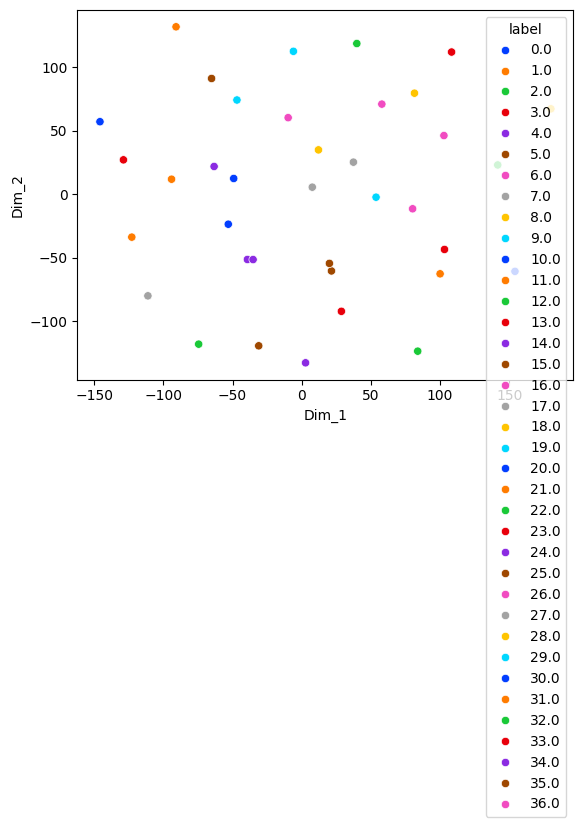

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000, :]
labels_1000 = label[0:1000]
 
model = TSNE(n_components = 3, random_state = 0)
 
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "Dim_3", "label"))

import seaborn as sn
sn.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()